# Process of Data Science
## Assignment 1
## Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('adult-data.csv', delimiter=', ', engine='python')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Plot a barchart with the education column

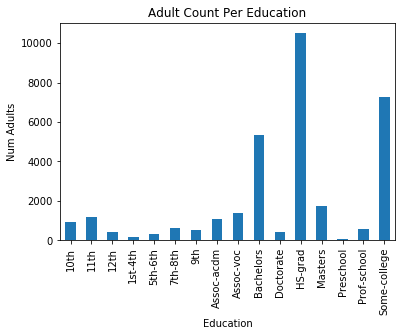

In [13]:
df_edu = df.groupby('education')['age'].count()
ax = df_edu.plot.bar()
ax.set_ylabel('Num Adults')
ax.set_xlabel('Education')
ax.set_title('Adult Count Per Education')
plt.show()

### This barchart tells us that
- The education level of most adults fall in the HS-grad, Bachelors, and Some-college categories. HS-grad is by far the most popular education level.
- The ratio of adults who got a Masters vs Bachelors degree is approximately 1/4.
- The ratio of adults who got a Doctorate vs Masters degree is approximately 1/4.

## Plot a histogram with the capital gain

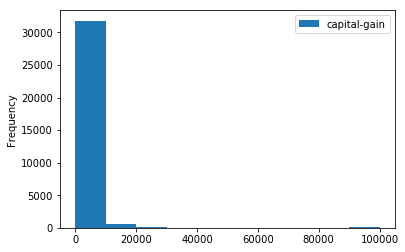

In [15]:
df_cap_gain = df[['capital-gain']]
df_cap_gain.plot.hist()
plt.show()

### This histogram tells us that
- The vast majority of adults don't see a rise in the value of a capital asset such as an investment or a real estate. The majority of adults falls in the range 0-10k.
- A very small percentage of adults end up gaining > 80k in capital gains.
- If you have capital gains as an adult, it will most likely fall somewhere in the 0-20k range.

## Does the histogram of capital gain follow the normal distribution?

In [18]:
import scipy.stats as scipystats

normality_test = scipystats.kstest(df_cap_gain, cdf='norm')

print('Test Statistic: ', normality_test[0])
print('P-value: ', normality_test[1])

Test Statistic:  1.0
P-value:  0.0


#### Normality Test Results:
The P-value is 0.0 ==> We have strong evidence to reject the null hypothesis.

The distribution is not normalized.

## Group the data based on marital status
### Create a scatterplot with the columns hours-per-week and age
### Show the distribution of both variables in the same chart

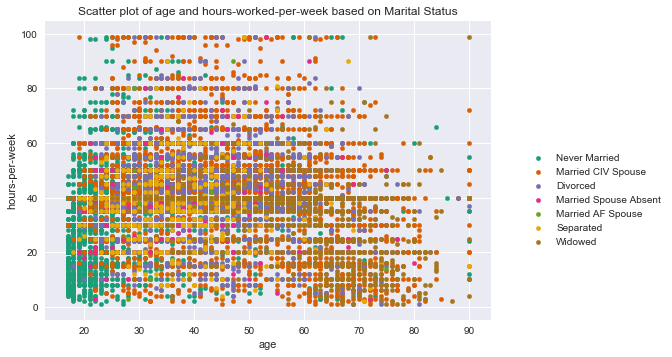

In [76]:
df_marital = df[['marital-status', 'hours-per-week', 'age']]

# construct boolean masks for each marital status
never_married = df_marital['marital-status'] == 'Never-married'
married_civ_spouse = df_marital['marital-status'] == 'Married-civ-spouse'
divorced = df_marital['marital-status'] == 'Divorced'
married_spouse_absent = df_marital['marital-status'] == 'Married-spouse-absent'
married_af_spouse = df_marital['marital-status'] == 'Married-AF-spouse'
separated = df_marital['marital-status'] == 'Separated'
widowed = df_marital['marital-status'] == 'Widowed'

# construct subplots and combine them
ax = df_marital[never_married].plot.scatter(x='age', y='hours-per-week', color='#1b9e77', label='Never Married')
ax2 = df_marital[married_civ_spouse].plot.scatter(x='age', y='hours-per-week', color='#d95f02', label='Married CIV Spouse', ax=ax)
ax3 = df_marital[divorced].plot.scatter(x='age', y='hours-per-week', color='#7570b3', label='Divorced', ax=ax2)
ax4 = df_marital[married_spouse_absent].plot.scatter(x='age', y='hours-per-week', color='#e7298a', label='Married Spouse Absent', ax=ax3)
ax5 = df_marital[married_af_spouse].plot.scatter(x='age', y='hours-per-week', color='#66a61e', label='Married AF Spouse', ax=ax4)
ax6 = df_marital[separated].plot.scatter(x='age', y='hours-per-week', color='#e6ab02', label='Separated', ax=ax5)
ax7 = df_marital[widowed].plot.scatter(x='age', y='hours-per-week', color='#a6761d', label='Widowed', ax=ax6)

# configure plot properties
ax7.set_title('Scatter plot of age and hours-worked-per-week based on Marital Status')
ax7.legend(loc='right', bbox_to_anchor=(1.4, 0.4))

# show graph
plt.show()

### This scatter plot shows that
- the majority of people who never married is in the age group 15-30
- the majority of divorded people are in the age group 30-60, and typically work 40-60 hours per week
- the majority of widowed people are 50+ years old, and they work 0-60 hours per week
- the majority of separated people are 25-45 years old and work around 40 hours per week.

### The Distribution of Age and Hours-Per-Week in the same graph

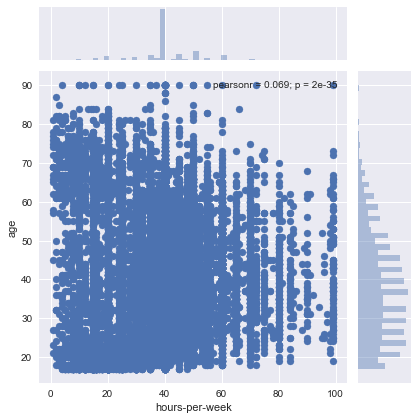

In [71]:
import seaborn as sns
sns.jointplot(x='hours-per-week', y='age', data=df_marital)
plt.show()

### This scatter plot tells us that
- The majority of Adults work 40 hours per week across all ages
- Most working adults are in the age range [18-50], and the number of working adults decreases as the age increases after the age of 40.


## Group the data based on education and create a boxplot to compare capital-loss among these groups

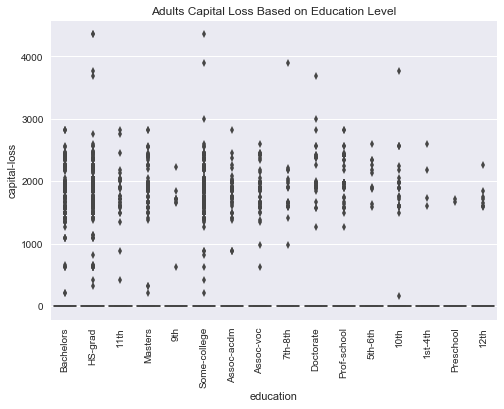

In [130]:
import seaborn as sns

df_edu_loss = df[['education', 'capital-loss']]
sns.boxplot(y='capital-loss', x='education', data=df_edu_loss)
# df_edu_loss.boxplot(column=['capital-loss'], by=['education'])
plt.title('Adults Capital Loss Based on Education Level')
plt.xticks(rotation='vertical')
plt.show()

### This boxplot shows that
- Most people, no matter what education they have, end up with a capital-loss around 1500-2500 USD

## Group the data by gender and calculate for the hours-per-week attribute:
- mean
- std dev
- 5th percentile
- 25th percentile
- 75th percentile
- 95th percentile

### Is there any difference hours-per-week worked between the 2 genders?

In [80]:
df_gender = df.groupby('sex')['hours-per-week']

print('Means:')
print(df_gender.mean().head())

print('\nstandard deviations:')
print(df_gender.std().head())

print('\n5th percentile:')
print(df_gender.quantile(q=0.05).head())

print('\n25th percentile:')
print(df_gender.quantile(q=0.25).head())

print('\n75th percentile:')
print(df_gender.quantile(q=0.75).head())

print('\n95th percentile:')
print(df_gender.quantile(q=0.95).head())

print('\nThe mean difference in hours-per-week worked between the two genders is 6.0177 hours.')
print('Men work on average more than women in this dataset.')

Means:
sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

standard deviations:
sex
Female    11.811300
Male      12.119755
Name: hours-per-week, dtype: float64

5th percentile:
sex
Female    15.0
Male      20.0
Name: hours-per-week, dtype: float64

25th percentile:
sex
Female    30.0
Male      40.0
Name: hours-per-week, dtype: float64

75th percentile:
sex
Female    40.0
Male      49.0
Name: hours-per-week, dtype: float64

95th percentile:
sex
Female    52.0
Male      60.0
Name: hours-per-week, dtype: float64

The mean difference in hours-per-week worked between the two genders is 6.0177 hours.
Men work on average more than women in this dataset.


## Create a plot to answer if there is a difference in capital gain between different race groups

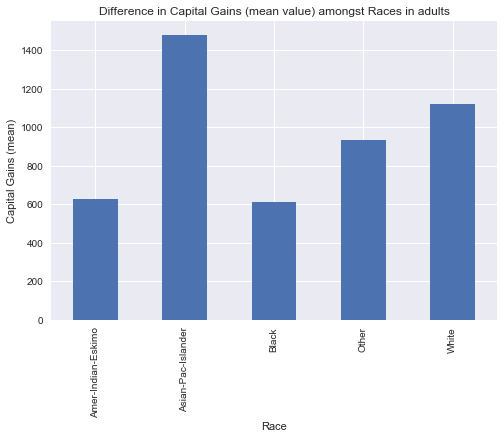

In [155]:
df_race = df.groupby('race')['capital-gain'].mean()
ax = df_race.plot.bar()
ax.set_ylabel('Capital Gains (mean value)')
ax.set_xlabel('Race')
ax.set_title('Difference in Capital Gains (mean value) amongst Races in adults')
plt.show()

### This barchart shows us
- a visualization of all mean values for each race
- the race with the highest mean in capital gains is the Asian-Pac-Islander race
- the race with the lowest mean in capital gains is the Black race
- the difference in capital gains between Asian-Pac-Islander and Black is approximately 850$ on average
- all other differences can be easily derived from this chart.